# Analyze Region 7

This notebook analyzes the largest glaciers and ice caps in Region 7 - Svalbard and Jan Mayen

In [1]:
import os
import os.path as op
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy.plot as ep

# set working dir
HOME = op.join(op.expanduser("~"))
os.chdir(os.path.join(HOME, "git/wgms-glacier-project"))

# Set up path to load scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

# Show Region 7

In [2]:
# Open natural earth basemap TIF file
# ne_fp = 'data/natural-earth/NE1_50m_SR/NE1_50M_SR.tif' # 50 m res
ne_fp = 'data/natural-earth/NE1_HR_LC_SR_W/NE1_HR_LC_SR_W.tif' # 10 m res
with rio.open(ne_fp) as ne_src:
    # Convert / read the data into a numpy array:
    ne_raster = ne_src.read()
    ne_src_extent = plotting_extent(ne_src)
    bounds = ne_src.bounds

In [3]:
# Open glacier regions
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)

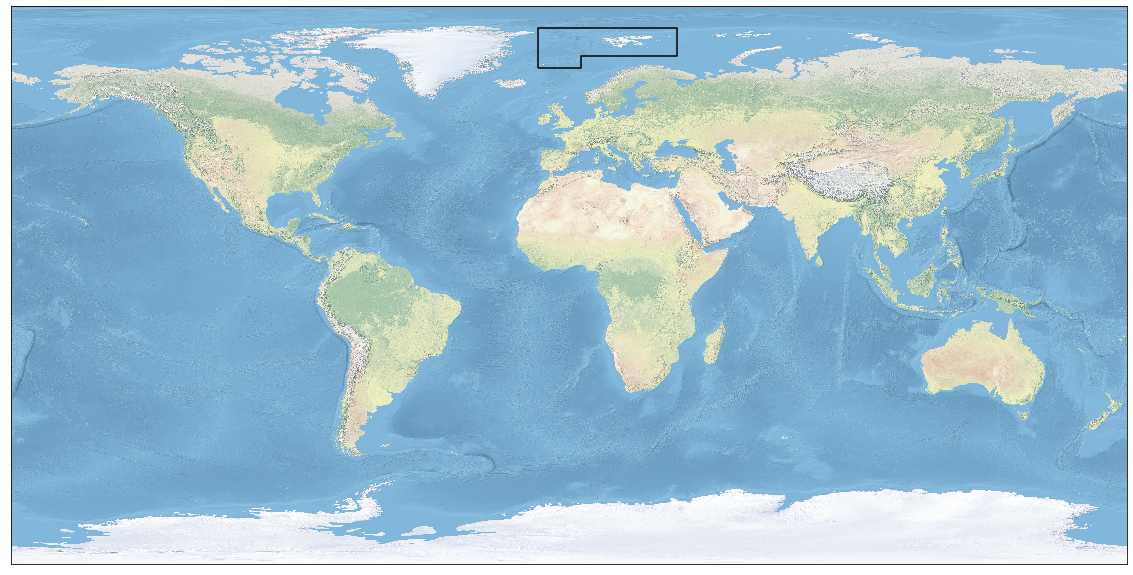

In [4]:
# Plot region 7 outline over the natural earth
# Plot natural earth basemap for Region 1
fig, ax = plt.subplots(figsize=(20, 20))

# Plot natural earth
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot region 7 noutline
glacier_regions[6:7].boundary.plot(ax=ax, color="black")

plt.show()

# Ice Caps

## Ten Largest for Svalbard and Jan Mayen

In [5]:
# Set region number. Note that region 7 has two different largest files: one for svalbard and one for jan mayan
# This was done because the two regions are quite far apart from one another even though they are considered to be 
# in the same region
region = 7

# Open region 7 svalbard largest ice caps file for epsg 3049
region_lg_svb_fn = "data/glims/processed/ice-caps/largest/largest-ice-caps-region_" + str(region) + "_epsg3049.shp"
ten_lg_region_7_svb_3049_df = gpd.read_file(region_lg_svb_fn)

# Open region 7 svalbard largest ice caps file for epsg 32635
region_lg_svb_fn = "data/glims/processed/ice-caps/largest/largest-ice-caps-region_" + str(region) + "_epsg32635.shp"
ten_lg_region_7_svb_32635_df = gpd.read_file(region_lg_svb_fn)

# Open region 7 jan mayen largest ice caps file for epsg 3058
region_lg_jm_fn = "data/glims/processed/ice-caps/largest/largest-ice-caps-region_" + str(region) + "_jan_mayan_epsg3058.shp"
ten_lg_region_7_jm_3058_df = gpd.read_file(region_lg_jm_fn)

In [6]:
# Print ten largest svalbard ice cap sizes - epsg 3049
ten_lg_region_7_svb_3049_df

,id,area,geometry
0,7,8402.703720,"POLYGON ((18.914782 78.469039, 18.910191 78.46..."
1,708,8077.403592,"POLYGON ((24.946811 79.36035200000001, 24.9392..."
2,8,5410.102716,"POLYGON ((13.66026 78.255189, 13.660433 78.255..."
3,431,4451.165085,"POLYGON ((18.185957 77.56537, 18.185853 77.565..."
4,706,2372.805757,"POLYGON ((19.215861 79.764661, 19.215788 79.76..."
5,215,1160.308733,"POLYGON ((23.382094 77.464433, 23.422874 77.45..."
6,638,646.149091,"POLYGON ((33.482192 80.22808499999999, 33.4878..."
7,871,511.149775,"POLYGON ((21.936172 78.491522, 21.963917 78.49..."
8,200,226.928046,"POLYGON ((22.046245 77.567789, 22.04168 77.568..."
9,762,161.182697,"POLYGON ((20.493904 79.52167, 20.497456 79.520..."


In [7]:
# Print ten largest svalbard ice cap sizes - epsg 32635
ten_lg_region_7_svb_32635_df

,id,area,geometry
0,7,8371.122191,"POLYGON ((18.914782 78.469039, 18.910191 78.46..."
1,708,8061.240557,"POLYGON ((24.946811 79.36035200000001, 24.9392..."
2,8,5383.861122,"POLYGON ((13.66026 78.255189, 13.660433 78.255..."
3,431,4426.882180,"POLYGON ((18.185957 77.56537, 18.185853 77.565..."
4,706,2366.448387,"POLYGON ((19.215861 79.764661, 19.215788 79.76..."
5,215,1156.768149,"POLYGON ((23.382094 77.464433, 23.422874 77.45..."
6,638,646.076572,"POLYGON ((33.482192 80.22808499999999, 33.4878..."
7,871,509.478741,"POLYGON ((21.936172 78.491522, 21.963917 78.49..."
8,200,226.114519,"POLYGON ((22.046245 77.567789, 22.04168 77.568..."
9,762,160.705987,"POLYGON ((20.493904 79.52167, 20.497456 79.520..."


In [8]:
# Print ten largest jan mayen ice cap sizes - epsg 3058
ten_lg_region_7_jm_3058_df

,id,area,geometry
0,33,118.792189,POLYGON ((-8.148241688999974 71.03465712100007...
1,4,0.222576,POLYGON ((-8.371137058999977 71.05213838300006...
2,19,0.189459,POLYGON ((-8.299012187999949 71.01444808500008...
3,15,0.177596,POLYGON ((-8.050405730999955 71.02550502200006...
4,22,0.167730,POLYGON ((-8.299847267999951 71.02116699800007...
5,18,0.146138,POLYGON ((-8.246046701999944 71.01434958300007...
6,3,0.139312,POLYGON ((-8.029386747999979 71.04128799700004...
7,12,0.138805,POLYGON ((-8.045878538999943 71.01626489100005...
8,17,0.126166,POLYGON ((-8.133996554999953 71.01466256800006...
9,14,0.117333,POLYGON ((-8.145961154999952 71.02406290300007...


In [26]:
# Open CSV file that contains ice cap sizes for epsg 32635 that were created by a manual dissovle of the
# shapefiles as opposed to the automatic exploding of the ice caps
region_7_ice_caps_dissolve_32635_fp = 'data/comparison/region-7-ice-cap-sizes-epsg32635.csv'
region_7_ice_caps_dissolve_32635 = pd.read_csv(region_7_ice_caps_dissolve_32635_fp)
region_7_ice_caps_dissolve_32635

,Ice Cap Name,GLIMS Area km^2,RGI Area km^2,Average Area km^2
0,Austfonna Ice Cap,8066.182528,8065.980900,8066.081714
1,Vestfonna Ice Cap,2376.444761,2376.441594,2376.443178
2,Olaf V Land Icefield,3869.044870,3848.620455,3858.832663
3,Asgardfonna Ice Cap,1541.256970,1541.257191,1541.257081
4,Beerenberg Ice Cap,-9999.000000,125.767349,-9999.000000


In [27]:
# Open CSV file that contains ice cap sizes for epsg 3049 that were created by a manual dissovle of the
# shapefiles as opposed to the automatic exploding of the ice caps
region_7_ice_caps_dissolve_3049_fp = 'data/comparison/region-7-ice-cap-sizes-epsg3049.csv'
region_7_ice_caps_dissolve_3049 = pd.read_csv(region_7_ice_caps_dissolve_3049_fp)
region_7_ice_caps_dissolve_3049

,Ice Cap Name,GLIMS Area km^2,RGI Area km^2,Average Area km^2
0,Austfonna Ice Cap,8082.355495,8082.153584,8082.254540
1,Vestfonna Ice Cap,2382.832660,2382.829486,2382.831073
2,Olaf V Land Icefield,3883.854919,3863.360704,3873.607811
3,Asgardfonna Ice Cap,1546.875244,1546.875466,1546.875355
4,Beerenberg Ice Cap,-9999.000000,128.655657,-9999.000000


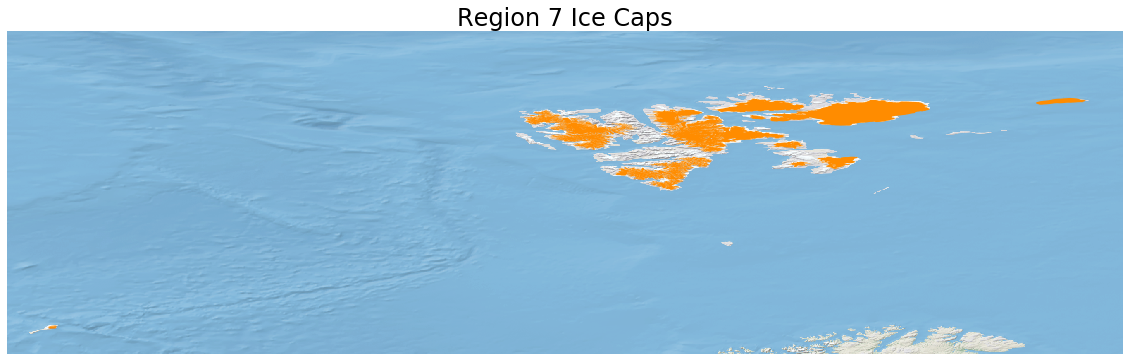

In [9]:
# Plot all region 7 ice caps in one frame
# Set up plot space
fig, ax = plt.subplots(figsize=(20, 20))
minx, miny, maxx, maxy = glacier_regions.loc[6:6].total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 7
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot largest and the title and legend
ten_lg_region_7_svb_3049_df.plot(ax=ax, color="darkorange")
ten_lg_region_7_jm_3058_df.plot(ax=ax, color="darkorange")
ax.set_title('Region 7 Ice Caps', fontsize=24)
ax.set_axis_off()

## Svalbard Ice Caps

In [10]:
# Create a clipping polygon for Svalbard area
# Create dataframe that holds the clipping box
svalbard_points = Polygon([(10.0, 81.0), (35.0, 81.0),
                                 (35.0, 74.0), (10.0, 74.0), 
                                 (10.0, 81.0)])
svalbard_gdf = gpd.GeoDataFrame([1],
                                 geometry=[svalbard_points],
                                 crs={'init': 'epsg:4362'})

In [11]:
# Select the 3 largest svalbard ice caps
svalbard_largest_ic_df = ten_lg_region_7_svb_3049_df[['id', 'area', 'geometry']].nlargest(3, 'area')

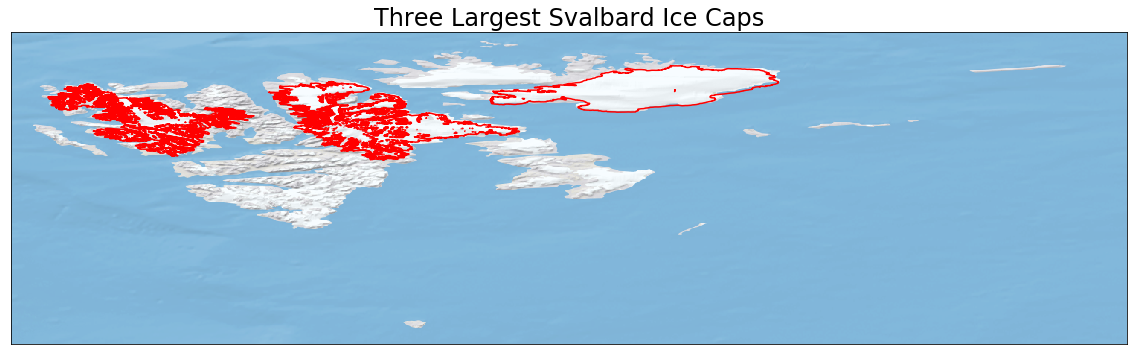

In [12]:
# Plot Svalbard ice caps over natural earth background
# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = svalbard_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot largest shapefile from jan mayen dataframe - this will be the main jan mayen ice cap
svalbard_largest_ic_df.boundary.plot(ax=ax, color='red')
ax.set_title('Three Largest Svalbard Ice Caps', fontsize=24)

plt.show()

## Jan Mayen Ice Caps

In [13]:
# Create a clipping polygon for Jan Mayan for plotting the Jan Mayen glaciers
# Create dataframe that holds the clipping box
jan_mayen_points = Polygon([(-9.5691, 71.5205), (-7.2620, 71.5205),
                                 (-7.2620, 70.5136), (-9.5691, 70.5136), 
                                 (-9.5691, 71.5205)])
jan_mayen_gdf = gpd.GeoDataFrame([1],
                                 geometry=[jan_mayen_points],
                                 crs={'init': 'epsg:4362'})

In [14]:
# Select the largest jan mayan ice caps since most of the shapefiles are very tiny except for one
jan_mayen_largest_ic_df = ten_lg_region_7_jm_3058_df[['id', 'area', 'geometry']].nlargest(1, 'area')
jan_mayen_largest_ic_df

,id,area,geometry
0,33,118.792189,POLYGON ((-8.148241688999974 71.03465712100007...


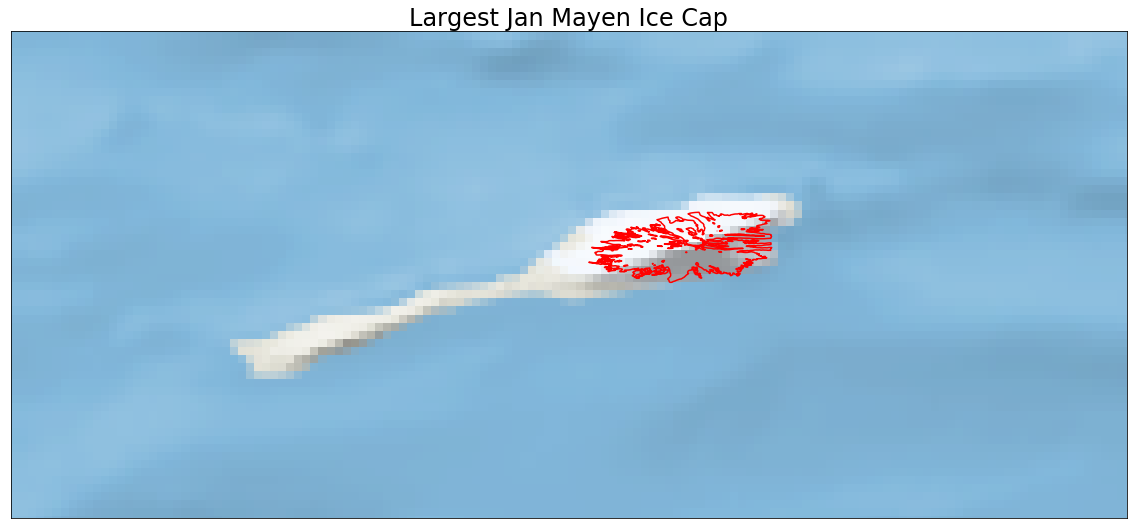

In [15]:
# Plot Jan Mayen ice cap over natural earth background
# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = jan_mayen_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot largest shapefile from jan mayen dataframe - this will be the main jan mayen ice cap
jan_mayen_largest_ic_df.boundary.plot(ax=ax, color='red')
ax.set_title('Largest Jan Mayen Ice Cap', fontsize=24)

plt.show()

# Glaciers

## Svalbard

In [16]:
# Open GLIMS region 7 three largest glacier outlines. These are all in Svalbard
glims_region_7_glaciers_fn = "data/glims/processed/largest/glims_region_7_largest.shp"
glims_region_7_glaciers_df = gpd.read_file(glims_region_7_glaciers_fn)

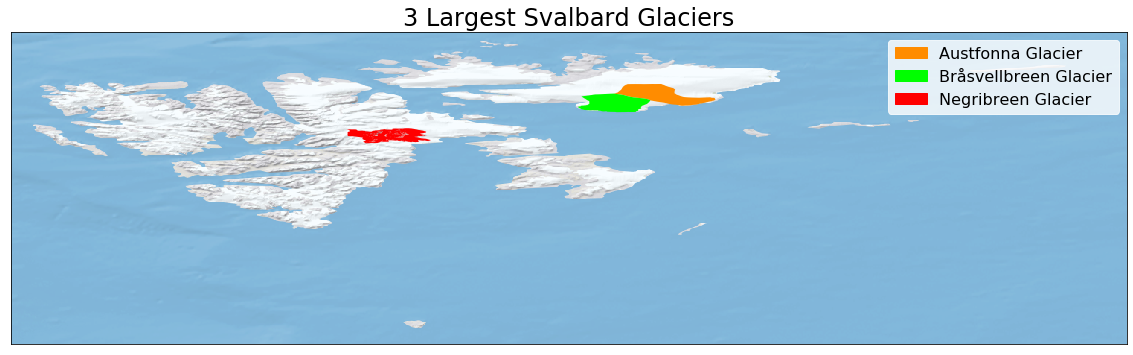

In [17]:
# Plot 3 largest Svalbard glaciers on natural earth
# Set up legend
legend_colors = ['darkorange', 'lime', 'red']
legend_labels = ['Austfonna Glacier',
                 'Bråsvellbreen Glacier', 'Negribreen Glacier']
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(legend_colors, legend_labels)]

# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = svalbard_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 3 largest glaciers from glims dataframe
glims_region_7_glaciers_df.iloc[0:1].plot(ax=ax, color='darkorange')
glims_region_7_glaciers_df.iloc[1:2].plot(ax=ax, color='lime')
glims_region_7_glaciers_df.iloc[2:3].plot(ax=ax, color='red')
ax.set_title('3 Largest Svalbard Glaciers', fontsize=24)
ax.legend(handles=legend_patches,
         facecolor ="white",
         edgecolor = "white",
         fontsize = 16,
         bbox_to_anchor = (1.0,1.0))

plt.show()

## Jan Mayen

In [18]:
# Open RGI region 7 because GLIMS version 20190304 doesn't contain Jan Mayen outlines
rgi_region_7_glaciers_fn = "data/rgi/raw/07_rgi60_Svalbard/07_rgi60_Svalbard.shp"
rgi_region_7_glaciers_df = gpd.read_file(rgi_region_7_glaciers_fn)

In [19]:
# Find the RGI outlines that lie within the jan mayen outline
jan_mayen_pip_mask = ws.pip(rgi_region_7_glaciers_df, jan_mayen_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
jan_mayen_region = rgi_region_7_glaciers_df.loc[jan_mayen_pip_mask]

In [20]:
jan_mayen_region.head()

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
1567,RGI60-07.01568,G351816E71042N,19759999,-9999999,-8.18374,71.0416,7,2,15.399,151,...,188,4678,0,0,0,0,9,9,NO4W00110001 Sorbreen,POLYGON ((-8.152296709999973 71.06584745900005...
1568,RGI60-07.01569,G351730E71043N,19759999,-9999999,-8.26959,71.0433,7,2,16.876,290,...,237,4479,0,0,0,0,9,9,NO4W00110002 Kpr Olavs Bre,POLYGON ((-8.163816320999956 71.07759836600007...
1569,RGI60-07.01570,G351719E71067N,19759999,-9999999,-8.28070,71.0672,7,2,9.053,216,...,270,6897,0,0,1,0,9,9,NO4W00110003 Kerckhoffbreen,POLYGON ((-8.265639263999958 71.07746787900004...
1570,RGI60-07.01571,G351736E71081N,19759999,-9999999,-8.26403,71.0814,7,2,5.367,292,...,284,6419,0,0,0,0,9,9,NO4W00110004 Charcotbreen,"POLYGON ((-8.25009311499997 71.08703898000005,..."
1571,RGI60-07.01572,G351726E71092N,19759999,-9999999,-8.27365,71.0923,7,2,3.114,173,...,303,2652,0,0,0,0,9,9,NO4W00110005 Vestisen,POLYGON ((-8.312807347999978 71.10437355200008...


In [21]:
# Select the 3 largest jan mayen glaciers
jan_mayen_largest_df = jan_mayen_region[['RGIId', 'GLIMSId', 'Area', 'Name', 'geometry']].nlargest(3, 'Area')

In [22]:
jan_mayen_largest_df

,RGIId,GLIMSId,Area,Name,geometry
1568,RGI60-07.01569,G351730E71043N,16.876,NO4W00110002 Kpr Olavs Bre,POLYGON ((-8.163816320999956 71.07759836600007...
1567,RGI60-07.01568,G351816E71042N,15.399,NO4W00110001 Sorbreen,POLYGON ((-8.152296709999973 71.06584745900005...
1569,RGI60-07.01570,G351719E71067N,9.053,NO4W00110003 Kerckhoffbreen,POLYGON ((-8.265639263999958 71.07746787900004...


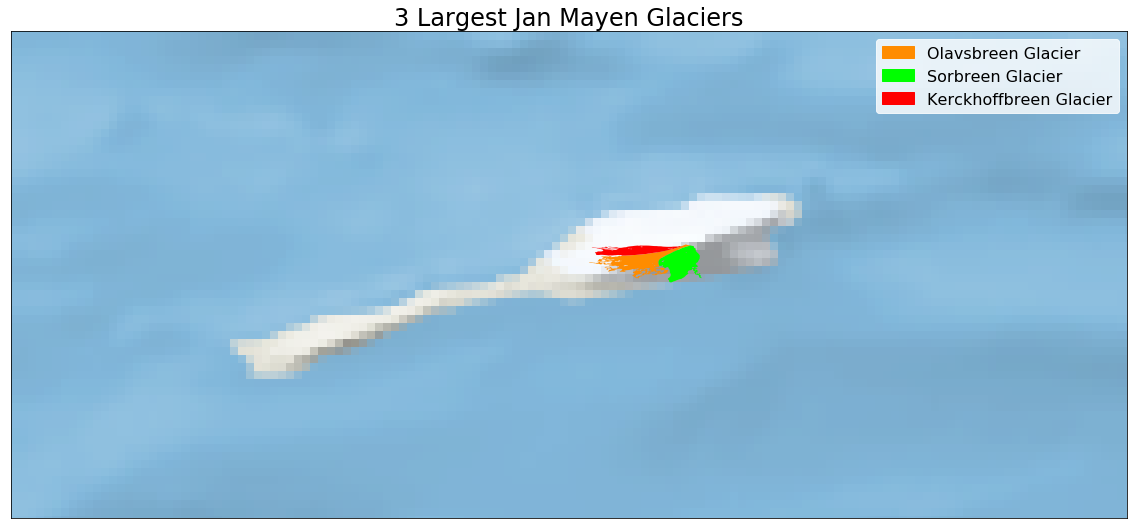

In [24]:
# Plot 3 largest Jan Mayen glaciers on natural earth
# Set up legend
legend_colors = ['darkorange', 'lime', 'red']
legend_labels = ['Olavsbreen Glacier',
                 'Sorbreen Glacier', 'Kerckhoffbreen Glacier']
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(legend_colors, legend_labels)]

# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = jan_mayen_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 3 largest glaciers from glims dataframe
jan_mayen_largest_df.iloc[0:1].plot(ax=ax, color='darkorange')
jan_mayen_largest_df.iloc[1:2].plot(ax=ax, color='lime')
jan_mayen_largest_df.iloc[2:3].plot(ax=ax, color='red')
ax.set_title('3 Largest Jan Mayen Glaciers', fontsize=24)
ax.legend(handles=legend_patches,
         facecolor ="white",
         edgecolor = "white",
         fontsize = 16,
         bbox_to_anchor = (1.0,1.0))

plt.show()